# Hand Written Digit Classification Using L-Layer Deep Network

The markdown cells are written with help of ChatGPT ( Isn't that Awesome 😆 ). <br>
The code is written by me (ChatGPT can't replace me ✌️)

### Importing required libraries

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# 1. Loading MNIST Dataset
In the code cells below, we are loading the MNIST dataset using the `load_data` function from the `mnist` module. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

The `load_data` function returns two tuples:
1. `train_X, train_Y`: These are the training dataset and the corresponding labels.
2. `test_X, test_Y`: These are the testing dataset and the corresponding labels.

By using this function, we can easily split our data into training and testing sets for the development of our machine learning model.


In [6]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

### 1a. Displaying the Shapes of the Datasets
In this section of the code, we are printing the shapes of our training and testing datasets:

- `train_X`: This is our training dataset. The shape `(60000, 28, 28)` indicates that there are 60,000 examples, each of which is a 28x28 pixel image.

- `train_Y`: This is the corresponding set of labels for the training dataset. The shape `(60000,)` indicates that there is a single label for each of the 60,000 examples in the training dataset.

- `test_X`: This is our testing dataset. The shape `(10000, 28, 28)` indicates that there are 10,000 examples, each of which is a 28x28 pixel image.

- `test_Y`: This is the corresponding set of labels for the testing dataset. The shape `(10000,)` indicates that there is a single label for each of the 10,000 examples in the testing dataset.

Printing the shapes of these datasets is a good practice as it helps us verify that our data is in the correct format and dimensions for our model.


In [7]:
print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_Y: {train_Y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_Y: {test_Y.shape}')

Shape of train_X: (60000, 28, 28)
Shape of train_Y: (60000,)
Shape of test_X: (10000, 28, 28)
Shape of test_Y: (10000,)


### 1b. Displaying some images from the dataset
The provided Python code is a compact and efficient way to visualize the first five images in a dataset. It uses matplotlib's `pyplot` module to create a 1x5 grid of subplots, each displaying an image from the `train_X` dataset in grayscale. The title of each subplot corresponds to the label of the image from the `train_Y` dataset. This visualization is particularly useful for getting a quick overview of the data, allowing us to inspect the images and their associated labels simultaneously.



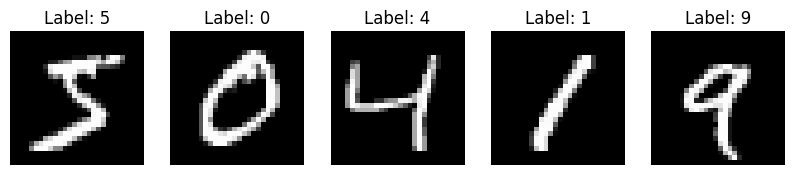

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(train_X[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_Y[i]))
    ax.axis('off')
    
plt.show()

# 2. Data Pre-processing 
## Reshaping and Normalizing the datasets for vectorized implementation
In this section of the code, we are performing several data preprocessing steps for our machine learning model:

1. **One-hot encoding**: We define a function `one_hot_encode` that converts our labels into one-hot vectors. This is necessary for multi-class classification tasks.

2. **Reshaping**: We reshape our input data `train_X` and `test_X` from the shape (number of examples, dimension) to (dimension, number of examples). We also reshape our labels `train_Y` and `test_Y`.

3. **Encoding labels**: We use the `one_hot_encode` function to convert our labels into one-hot encodings.

4. **Normalization**: We normalize our input data by dividing it by the maximum pixel value (255). This is a common preprocessing step in image processing tasks to ensure our model trains more efficiently.

Finally, we print the shapes of our training and testing data to ensure they're in the correct format for our model.


In [9]:
# function to encode our labels into one hot vectors for classification
def one_hot_encode(Y,C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# reshaping our datamfrom (no of examples, dim) to (dim, no of examples)
train_X = train_X.reshape(train_X.shape[0],-1).T
test_X = test_X.reshape(test_X.shape[0],-1).T
train_Y = train_Y.reshape(-1,train_Y.shape[0])
test_Y = test_Y.reshape(-1,test_Y.shape[0])

# encoding our labels into one hot encodings
train_Y = one_hot_encode(train_Y, 10)
test_Y = one_hot_encode(test_Y, 10)

# normalizing (dividing by max pixel value)
train_X = train_X/255
test_X = test_X/255

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_Y: {train_Y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_Y: {test_Y.shape}')

Shape of train_X: (784, 60000)
Shape of train_Y: (10, 60000)
Shape of test_X: (784, 10000)
Shape of test_Y: (10, 10000)


# 3. Coding Our Network
The model I have coded is a dynamic L-layer network. So any amount of layers can be implemented

## 3a. Vectorized Activation Functions

The provided Python code defines several key functions used in neural networks, These functions will later be used at different layers in our network:

1. **Activation Functions**: These functions are applied to the input of a neuron, transforming it into an output that is passed onto the next layer. The code includes definitions for the sigmoid (`sigmoid`), softmax (`softmax`), ReLU (`relu`), and tanh (`tanh`) activation functions.

2. **Derivatives of Activation Functions**: These functions compute the derivatives of the activation functions, which are essential for the backpropagation algorithm used during the training of neural networks. The code includes definitions for the derivatives of the ReLU (`relu_prime`), sigmoid (`sigmoid_prime`), softmax(`softmax_prime`) and tanh (`tanh_prime`) functions.

In summary, this code provides the basic building blocks for implementing a neural network from scratch.

#### To know more about activation functions and their derivatives, refer to the blogs below.

a. [Medium - Activation Functions in Neural Networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) <br>
b. [Analytics Vidhya - Activation Functions and their Derivatives – A Quick & Complete Guide](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/)

In [10]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def relu(Z):
    A = np.maximum(0,Z)
    return A

def tanh(Z):
    A = np.tanh(Z)
    return A

# The derivatives of these functions are later used in our back propagation

def relu_prime(Z):     # derivatice of relu function 
    derivative = (Z > 0).astype(int)
    return derivative

def sigmoid_prime(Z):  # derivative of sigmoid function
    A = sigmoid(Z)
    derivative = A * (1 - A)
    return derivative

def tanh_prime(Z):     # derivative of tanh function
    A = tanh(Z)
    derivative = 1 - np.square(A)
    return derivative

def softmax_prime(Z):  # derivative of softmax
    A = softmax(Z)
    derivative = A * (1 - A)
    return derivative


## 3b. Initialization of Parameters
The provided Python function `initialize_parameters(layers_dims, activation_functions)` is used to initialize the weights and biases for a neural network. 

#### Parameters:
- `layers_dims`: A list containing the dimensions of each layer in the network. For example, `[784, 10, 10, 10]` means the network has an input layer of size 784 (28 * 28)`(image width * image height)` , followed by three layers of size 10.
- `activation_functions`: A list containing the activation functions to be used in each layer of the network. For example, `["", "relu", "relu", "softmax"]` the first layer (input layer) has no activation function, thats why it is empty `""`, the next two layers use the ReLU activation function, and the final layer uses the softmax activation function.

#### Functionality:
The function initializes the weights and biases for each layer in the network. The weights are initialized differently based on the activation function of the layer to help avoid issues with vanishing and exploding gradients. 

- For layers with ReLU activation, He initialization is used, which initializes the weights as random values from a normal distribution, scaled by the square root of 2 divided by the dimension of the previous layer.
- For layers with sigmoid, tanh, or softmax activation, Xavier/Glorot initialization is used, which initializes the weights as random values from a normal distribution, scaled by the square root of 1 divided by the dimension of the previous layer.
- For layers with other activation functions, the weights are initialized as small random values from a normal distribution, scaled by 0.01.

The biases for all layers are initialized as zeros.

The function returns a dictionary `parameters` where the keys are strings of the form "W1", "b1", "W2", "b2", etc., and the values are the corresponding initialized weights and biases.

### Visit the link below to know more
[Weight Initialization Techniques in Neural Networks](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78)

In [7]:
def intialize_parameters(layers_dims,activation_functions):
    parameters = {}
    L = len(layers_dims)

    # the different initialization methods help us in avoiding vanishing and exploding gradients 
    
    for l in range(1,L):
        if activation_functions[l] == "relu":
            # He initialization for ReLU activation
            parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
            
        elif activation_functions[l] == "sigmoid" or activation_functions[l] == "tanh" or activation_functions[l] == "softmax":
            # Xavier/Glorot initialization for Sigmoid or Tanh activation
            parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(1/layers_dims[l-1])
            
        else:
            # Default initialization for other activations
            parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01
            
        parameters["b" + str(l)] = np.zeros((layers_dims[l],1))

    return parameters

## 3. Forward Propagation
The provided Python functions are used to perform forward propagation in a neural network.

### Functions:
1. `linear_forward(A_prev, W, b)`: This function performs the linear part of a layer's forward propagation.
    - `A_prev`: The activations from the previous layer.
    - `W`: The weight matrix for the current layer.
    - `b`: The bias vector for the current layer.
    - The function calculates `Z = np.dot(W, A) + b` and returns `Z`.

2. `linear_activation_forward(A_prev, W, b, activation)`: This function adds the activation function to the linear forward propagation.
    - `A_prev`: The activations from the previous layer.
    - `W`: The weight matrix for the current layer.
    - `b`: The bias vector for the current layer.
    - `activation`: The activation function to be used (a string, e.g., "relu").
    - The function first calls `linear_forward(A, W, b)` to get `Z`, then applies the specified activation function to `Z`, and returns both `A` and `Z`.

3. `L_model_Forward(X, parameters, layers_dims, activation_functions)`: This function performs forward propagation for the entire network (from input `X` to the output layer).
    - `X`: The input data.
    - `parameters`: The initialized parameters (weights and biases).
    - `layers_dims`: The dimensions of the layers.
    - `activation_functions`: The activation functions for the layers.
    - The function loops over the layers, calling `linear_activation_forward` for each layer with the appropriate parameters and activation function. It stores the computed `A` and `Z` for each layer in the `activations` dictionary, which is returned at the end.

#### Example Function Call:
`L_model_Forward(train_X, parameters, [784,10,10,10], ["", "relu","relu", "softmax"])`

In this example:
- `train_X` is the input data for the network. It could be a 2D numpy array where each column represents a flattened image and each row represents a feature (pixel).
- `parameters` are the initialized weights and biases for the network. These would have been returned by the `initialize_parameters` function.
- `[784,10,10,10]` is the `layers_dims` list, which specifies the dimensions of each layer in the network. In this case, the network has an input layer of size 784 (which could correspond to a 28x28 pixel image), followed by three layers of size 10.
- `["", "relu","relu", "softmax"]` is the `activation_functions` list, which specifies the activation function to be used in each layer. In this case, the first layer (input layer) has no activation function, the next two layers use the ReLU activation function, and the final layer uses the softmax activation function.

The function will perform forward propagation from the input layer to the output layer, applying the specified activation functions at each layer, and return a dictionary containing the computed activations and linear outputs (`Z`) for each layer.


In [11]:
def linear_forward(A_prev,W,b):
    Z = np.dot(W,A_prev) + b
    return Z

def linear_activation_forward(A_prev,W,b,activation):
    Z = linear_forward(A_prev,W,b)

    if activation == 'relu':
        A = relu(Z)
    elif activation == 'sigmoid':
        A = sigmoid(Z)
    elif activation == 'softmax':
        A = softmax(Z)
    elif activation == 'tanh':
        A = tanh(Z)

    return A, Z

def L_model_Forward(X, parameters, layers_dims, activation_functions):
    activations = {}
    L = len(layers_dims)

    A_prev = X
    
    for l in range(1,L):
        activations["A"+str(l)], activations["Z"+str(l)] = linear_activation_forward(A_prev,parameters["W"+str(l)]
                                                                                     ,parameters["b"+str(l)], activation_functions[l])
        A_prev = activations["A"+str(l)]

    return activations

## 4. Cost Function
Change this function if your final layer activation is not softmax

In [9]:
def compute_cost(A , Y):     # A : output layer activations, Y: Output true labels (one-hot encoded)
    m = Y.shape[1]
    
    cost_value = (1/m) * np.sum((-1)*Y*np.log(A)) # cost function for softmax 
    
    return cost_value

## 5. Backward Propagation
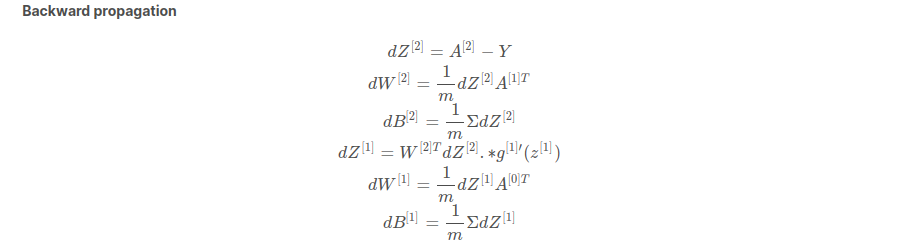

In [10]:
def L_model_backward(activations, parameters , X,Y, layers_dims, activation_functions):
    derivatives = {}
    L = len(layers_dims)
    m = Y.shape[1]
    last_layer = str(L -1)

    for l in reversed(range(1,L)):
        if l == L-1:
            # first derivatice w.r.t cost function (last layer) 
            # should be change if you are using any other layer than softmax as your last layer
            derivatives["dZ"+str(l)] = activations["A"+str(l)] - Y
        else:
            if activation_functions[l] == 'relu':
                derivatives["dZ"+str(l)] = (np.dot(parameters["W"+str(l+1)].T,derivatives["dZ"+str(l+1)])) * (relu_prime(activations["Z"+str(l)]))
            elif activation_functions[l] == 'sigmoid':
                derivatives["dZ"+str(l)] = (np.dot(parameters["W"+str(l+1)].T,derivatives["dZ"+str(l+1)])) * (sigmoid_prime(activations["Z"+str(l)]))
            elif activation_functions[l] == 'tanh':
                derivatives["dZ"+str(l)] = (np.dot(parameters["W"+str(l+1)].T,derivatives["dZ"+str(l+1)])) * (tanh_prime(activations["Z"+str(l)]))


        if l == 1:
            derivatives["dW"+str(l)] = (1/m) * np.dot(derivatives["dZ"+str(l)], X.T)
        else:
            derivatives["dW"+str(l)] = (1/m) * np.dot(derivatives["dZ"+str(l)], activations["A"+str(l-1)].T)
            
        derivatives["db"+str(l)] = (1/m) * (np.sum(derivatives["dZ"+str(l)], axis=1 , keepdims=True))

    return derivatives

## 6. Update Parameters

In [11]:
def update_params(parameters, derivatives, alpha, layers_dims):
    L = len(layers_dims)

    for l in range(1,L):
        parameters["W"+str(l)] = parameters["W"+str(l)] - (alpha * derivatives["dW"+str(l)])
        parameters["b"+str(l)] = parameters["b"+str(l)] - (alpha * derivatives["db"+str(l)])
          
    return parameters

## 7. Gradient Descent

In [12]:
def Gradient_Descent(X,Y,alpha,iterations, layers_dims, activation_functions):
    costs = []
    
    parameters = intialize_parameters(layers_dims, activation_functions)
    
    L = len(layers_dims)
    
    for i in tqdm(range(iterations)):
        
        activations = L_model_Forward(X, parameters, layers_dims, activation_functions)
        
        cost = compute_cost(activations["A"+str(L-1)] , Y)
        
        derivatives = L_model_backward(activations, parameters, X, Y, layers_dims, activation_functions)
        
        parameters = update_params(parameters, derivatives, alpha, layers_dims)

        if i % 10 == 0:
            costs.append(cost)

    return parameters, costs

## 8. Functions to Evaluate Model

In [29]:
def accuracy(parameters,X,Y, layers_dims, activation_functions):
    L = len(layers_dims)-1  # final layer ( used to get activations of the last layer)
    
    activations = L_model_Forward(X, parameters, layers_dims, activation_functions)
    predictions = np.argmax(activations["A"+str(L)], axis=0)
    labels = np.argmax(Y,axis=0)

    accuracy = np.sum(predictions == labels) / len(labels)

    return accuracy

def plot_confusion_matrix(parameters, X, Y, layers_dims, activation_functions):
    L = len(layers_dims) - 1  # final layer (used to get activations of the last layer)
    activations = L_model_Forward(X, parameters, layers_dims, activation_functions)
    predictions = np.argmax(activations["A"+str(L)], axis=0)
    labels = np.argmax(Y, axis=0)
    
    # Calculate confusion matrix
    cm = confusion_matrix(labels, predictions)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

def model_results(params,costs,learning_rate,layers_dims,activation_functions):
    print("Plotting the Cost function:")

    # ------------------------------------ Cost Function History ----------------------------------------
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # -------------------------------------- Printing Accuracy ------------------------------------------
    print("Printing Accuracy for train and test set: \n")
    
    train_acc = accuracy(params,train_X,train_Y,layers_dims, activation_functions)
    test_acc = accuracy(params,test_X,test_Y,layers_dims, activation_functions)
    
    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")

    # --------------------------------------- Plotting Confusion Matrices ------------------------------- 
    print("\n\nConfusion Matrix for Train Set")
    plot_confusion_matrix(params,train_X,train_Y,layers_dims, activation_functions)

    print("Confusion Matrix for Test Set")
    plot_confusion_matrix(params,test_X,test_Y,layers_dims, activation_functions)

## 9. Defining Our Model

In [25]:
layers_dims = [784,10,10,10]         # 784 is the dimension of input layer
activation_functions = ["", "relu","relu", "softmax"]  # first column is blank because there is no activation from the input layer
learning_rate = 0.01
num_of_iterations = 500

## Training our Model

In [14]:
params, costs = Gradient_Descent(train_X,train_Y,learning_rate,num_of_iterations, layers_dims, activation_functions)

100%|█████████████████████████████████████████| 500/500 [01:32<00:00,  5.43it/s]


## Evaluating our Model

Plotting the Cost function:


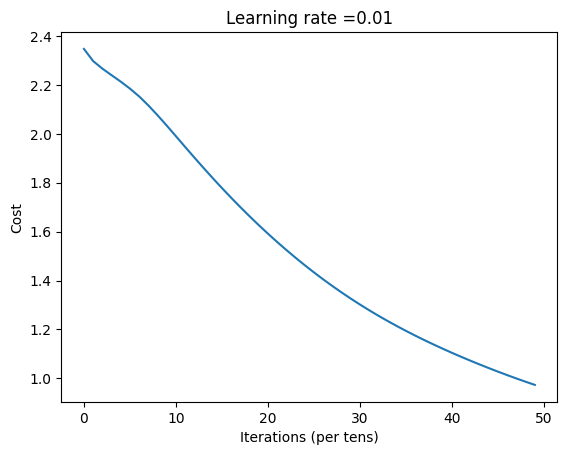

Printing Accuracy for train and test set: 

Train Accuracy: 0.6986666666666667
Test Accuracy: 0.7038


Confusion Matrix for Train Set


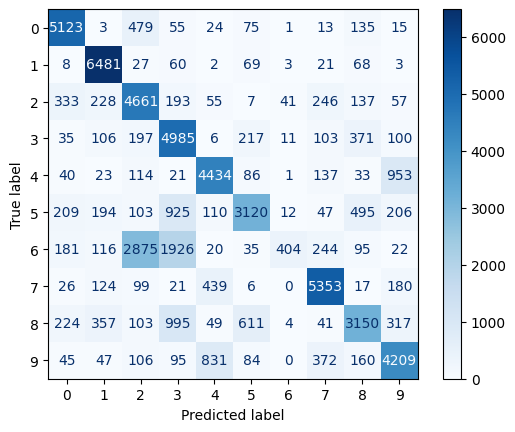

Confusion Matrix for Test Set


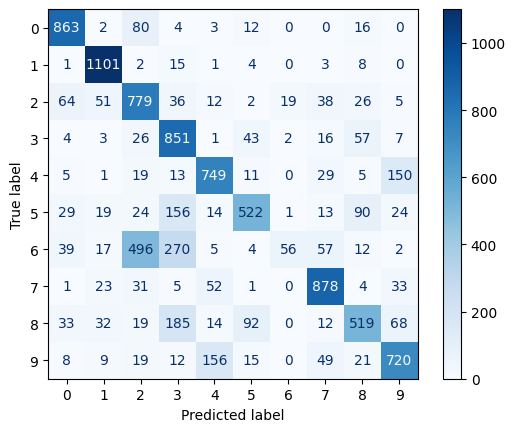

In [30]:
model_results(params,costs,learning_rate,layers_dims,activation_functions)

### Prediction for one image

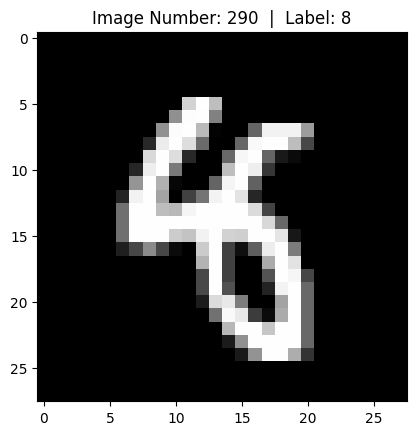

Prediction: 4


In [31]:
image_index = 290               # we are predicting on our test set of size 10000, so keep this index < 10000

plt.title(f"Image Number: {image_index}  |  Label: {np.argmax(test_Y[:,image_index])}")
plt.imshow((test_X[:,image_index]*255).reshape(28,28),cmap='gray')
plt.show()

pred_image = test_X[:,image_index].reshape(-1, 1)

activation = L_model_Forward(pred_image, params, layers_dims, activation_functions)

pred = np.argmax(activation["A" + str(len(layers_dims)-1)])
print(f"Prediction: {pred}")

## Training Different Models Now

In [34]:
# -------------------------------------------- Model 2 -----------------------------------------

layers_dims = [784,100,40,10]         # 784 is the dimension of input layer
activation_functions = ["", "relu","relu", "softmax"]  # first column is blank because there is no activation from the input layer
learning_rate = 0.1
num_of_iterations = 500


In [35]:
params, costs = Gradient_Descent(train_X,train_Y,learning_rate,num_of_iterations, layers_dims, activation_functions)

100%|█████████████████████████████████████████| 500/500 [03:44<00:00,  2.23it/s]


Plotting the Cost function:


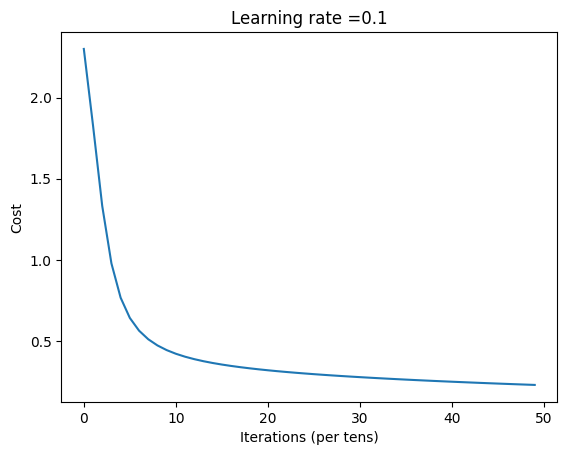

Printing Accuracy for train and test set: 

Train Accuracy: 0.9352
Test Accuracy: 0.9341


Confusion Matrix for Train Set


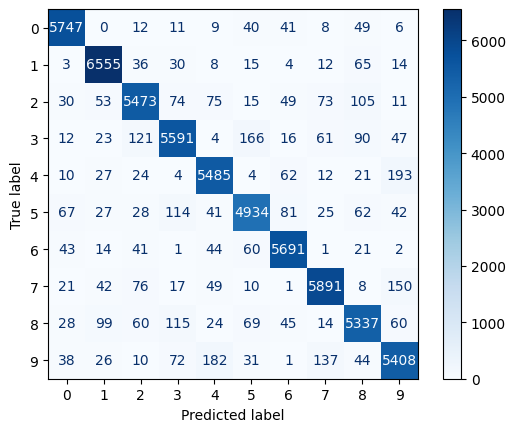

Confusion Matrix for Test Set


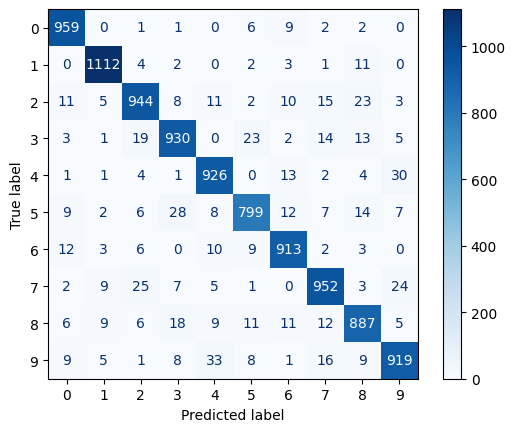

In [36]:
model_results(params,costs,learning_rate,layers_dims,activation_functions)

In [59]:
# -------------------------------------------- Model 3 -----------------------------------------

layers_dims = [784,40,40,20,20,10]         # 784 is the dimension of input layer
activation_functions = ["", "relu", "relu","relu", "relu", "softmax"]  # first column is blank because there is no activation from the input layer
learning_rate = 0.1
num_of_iterations = 800

In [60]:
params, costs = Gradient_Descent(train_X,train_Y,learning_rate,num_of_iterations, layers_dims, activation_functions)

100%|█████████████████████████████████████████| 800/800 [05:42<00:00,  2.34it/s]


Plotting the Cost function:


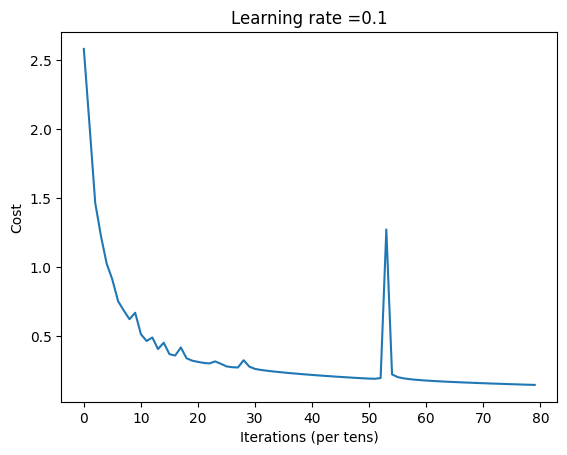

Printing Accuracy for train and test set: 

Train Accuracy: 0.9581333333333333
Test Accuracy: 0.9521


Confusion Matrix for Train Set


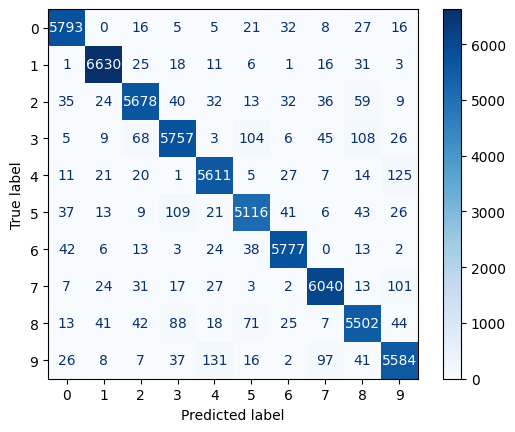

Confusion Matrix for Test Set


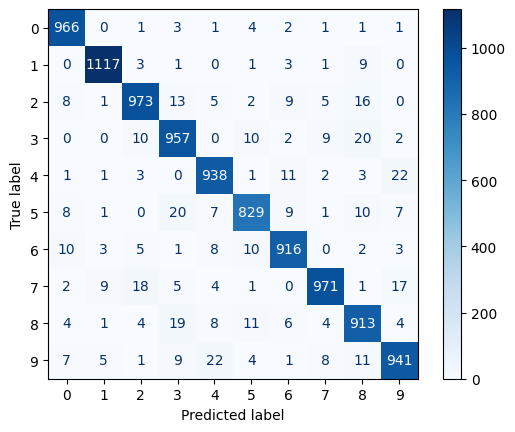

In [61]:
model_results(params,costs,learning_rate,layers_dims,activation_functions)

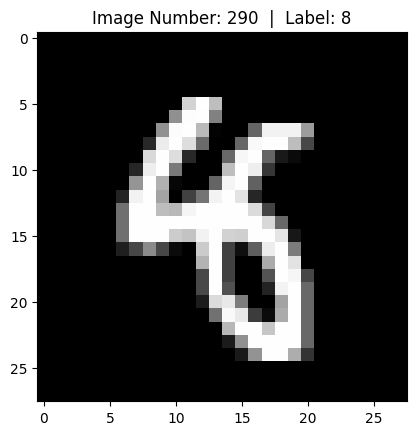

Prediction: 8


In [58]:
image_index = 290               # we are predicting on our test set of size 10000, so keep this index < 10000

plt.title(f"Image Number: {image_index}  |  Label: {np.argmax(test_Y[:,image_index])}")
plt.imshow((test_X[:,image_index]*255).reshape(28,28),cmap='gray')
plt.show()

pred_image = test_X[:,image_index].reshape(-1, 1)

activation = L_model_Forward(pred_image, params, layers_dims, activation_functions)

pred = np.argmax(activation["A" + str(len(layers_dims)-1)])
print(f"Prediction: {pred}")